# Name: Nisrin Dhoondia  

# Email: nisrin.dhoondia@gmail.com  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv')

In [ ]:
df.columns

Index(['Sno', 'Date', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths'],
      dtype='object')

In [ ]:
df.rename(columns = {'Sno' : 'sno', 'Date' : 'date', 'State/UnionTerritory' : 'state_or_unionterritory', 
                     'ConfirmedIndianNational' : 'confirmed_indian_national',
                     'ConfirmedForeignNational' : 'confirmed_foreign_national', 'Cured' : 'cured', 'Deaths' : 'deaths'}, inplace=True)

In [ ]:
df['date'] = pd.to_datetime(df['date'] , format = '%d/%m/%y')

In [ ]:
df.drop(['sno'], axis = 1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        270 non-null    datetime64[ns]
 1   state_or_unionterritory     270 non-null    object        
 2   confirmed_indian_national   270 non-null    int64         
 3   confirmed_foreign_national  270 non-null    int64         
 4   cured                       270 non-null    int64         
 5   deaths                      270 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 12.8+ KB


In [ ]:
df.head()

,date,state_or_unionterritory,confirmed_indian_national,confirmed_foreign_national,cured,deaths
0,2020-01-30,Kerala,1,0,0,0
1,2020-01-31,Kerala,1,0,0,0
2,2020-02-01,Kerala,2,0,0,0
3,2020-02-02,Kerala,3,0,0,0
4,2020-02-03,Kerala,3,0,0,0


In [ ]:
df.tail()

,date,state_or_unionterritory,confirmed_indian_national,confirmed_foreign_national,cured,deaths
265,2020-03-21,Jammu and Kashmir,4,0,0,0
266,2020-03-21,Ladakh,13,0,0,0
267,2020-03-21,Uttar Pradesh,23,1,9,0
268,2020-03-21,Uttarakhand,3,0,0,0
269,2020-03-21,West Bengal,3,0,0,0


In [ ]:
df.describe()

,confirmed_indian_national,confirmed_foreign_national,cured,deaths
count,270.000000,270.000000,270.000000,270.000000
mean,5.551852,1.329630,0.603704,0.092593
std,8.339625,3.587288,1.461522,0.290399
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,6.000000,0.000000,0.000000,0.000000
max,60.000000,14.000000,9.000000,1.000000


In [ ]:
datewise_df = df.groupby(['date'], sort = False)['state_or_unionterritory', 'confirmed_indian_national', 'confirmed_foreign_national','cured', 'deaths']

In [ ]:
datewise_df.head()

,state_or_unionterritory,confirmed_indian_national,confirmed_foreign_national,cured,deaths
0,Kerala,1,0,0,0
1,Kerala,1,0,0,0
2,Kerala,2,0,0,0
3,Kerala,3,0,0,0
4,Kerala,3,0,0,0
...,...,...,...,...,...
248,Andhra Pradesh,3,0,0,0
249,Chhattisgarh,1,0,0,0
250,Delhi,25,1,5,1
251,Gujarat,7,0,0,0


In [ ]:
df['total_cases']= np.sum(df[['state_or_unionterritory', 'confirmed_indian_national', 'confirmed_foreign_national','cured', 'deaths']], axis=1)

In [ ]:
df.head()

,date,state_or_unionterritory,confirmed_indian_national,confirmed_foreign_national,cured,deaths,total_cases
0,2020-01-30,Kerala,1,0,0,0,1
1,2020-01-31,Kerala,1,0,0,0,1
2,2020-02-01,Kerala,2,0,0,0,2
3,2020-02-02,Kerala,3,0,0,0,3
4,2020-02-03,Kerala,3,0,0,0,3


In [ ]:
df.tail()

,date,state_or_unionterritory,confirmed_indian_national,confirmed_foreign_national,cured,deaths,total_cases
265,2020-03-21,Jammu and Kashmir,4,0,0,0,4
266,2020-03-21,Ladakh,13,0,0,0,13
267,2020-03-21,Uttar Pradesh,23,1,9,0,33
268,2020-03-21,Uttarakhand,3,0,0,0,3
269,2020-03-21,West Bengal,3,0,0,0,3


In [ ]:
df[df['date'] == '2020-03-04']['total_cases'].sum()

31

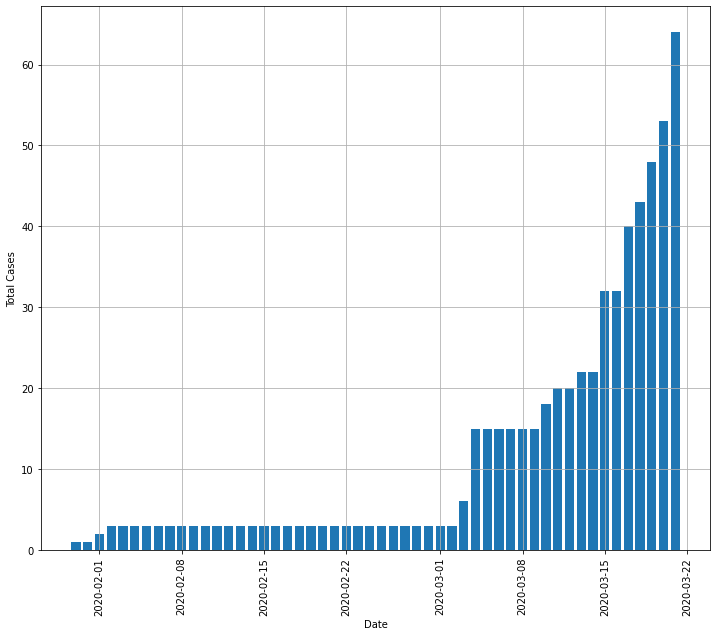

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(df['date'], df['total_cases'])
plt.xticks(rotation = 90)
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.show()

In [ ]:
df = df.reindex(index=df.index[::-1])
df['r'] = (df['total_cases'].pct_change())
df = df.reindex(index=df.index[::-1])
df.head()

,date,state_or_unionterritory,confirmed_indian_national,confirmed_foreign_national,cured,deaths,total_cases,r
0,2020-01-30,Kerala,1,0,0,0,1,0.000000
1,2020-01-31,Kerala,1,0,0,0,1,-0.500000
2,2020-02-01,Kerala,2,0,0,0,2,-0.333333
3,2020-02-02,Kerala,3,0,0,0,3,0.000000
4,2020-02-03,Kerala,3,0,0,0,3,0.000000


In [ ]:
tempdf = df[df['date'] == '2020-03-04']
tempdf

,date,state_or_unionterritory,confirmed_indian_national,confirmed_foreign_national,cured,deaths,total_cases,r
39,2020-03-04,Uttar Pradesh,6,0,0,0,6,0.000000
40,2020-03-04,Kerala,3,0,3,0,6,2.000000
41,2020-03-04,Haryana,0,2,0,0,2,1.000000
42,2020-03-04,Delhi,1,0,0,0,1,0.000000
43,2020-03-04,Telengana,1,0,0,0,1,-0.933333
44,2020-03-04,Rajasthan,1,14,0,0,15,6.500000


In [ ]:
r = tempdf['r'].mean()
r

1.4277777777777778

In [ ]:
P_o = tempdf['total_cases'].sum()
P_o

31

In [ ]:
e = 2.718
e

2.718

In [ ]:
t = tempdf['confirmed_indian_national'].sum() + tempdf['confirmed_foreign_national'].sum()
t

28

In [ ]:
t = 26

In [ ]:
P_t = P_o * (e ** (r*t))
P_t

4.089463775634859e+17